<a href="https://colab.research.google.com/github/sumedhakoranga/employee_future_prediction/blob/main/eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset link: https://www.kaggle.com/tejashvi14/employee-future-prediction

# Uploading dataset

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Employee.csv to Employee.csv


# Initialization

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Employee.csv')

X = df.drop(['LeaveOrNot'], axis=1)
y = df['LeaveOrNot']

# Splitting into training (validation included) and test sets

Early splitting will help ensure that the data used for training and validation has no information which available in the testing/final evaluation dataset.

In [ ]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

In [ ]:
X_train.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
2557,Bachelors,2012,Bangalore,3,29,Male,Yes,2
1718,Bachelors,2015,Pune,3,27,Female,Yes,5
3616,Masters,2015,New Delhi,3,38,Male,No,1
644,Masters,2016,New Delhi,3,25,Female,No,3
2844,Masters,2017,Pune,2,26,Female,No,4


# Exploratory Data Analysis (EDA)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2791 entries, 2557 to 4184
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  2791 non-null   object
 1   JoiningYear                2791 non-null   int64 
 2   City                       2791 non-null   object
 3   PaymentTier                2791 non-null   int64 
 4   Age                        2791 non-null   int64 
 5   Gender                     2791 non-null   object
 6   EverBenched                2791 non-null   object
 7   ExperienceInCurrentDomain  2791 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 196.2+ KB


In [ ]:
numerical = ['Age']
categorical = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']

## Target

In [ ]:
y_train.head()

2557    1
1718    1
3616    0
644     1
2844    1
Name: LeaveOrNot, dtype: int64

In [ ]:
y_train.value_counts()

0    1803
1     988
Name: LeaveOrNot, dtype: int64

`0` means employee did not leave in the next 2 years.

`1` means employee did leave in the next 2 years.

## Numerical Features

There is only 1 numerical feature in the dataset `Age`.

In [ ]:
X_numerical = X_train[numerical]

X_numerical.head()

,Age
2557,29
1718,27
3616,38
644,25
2844,26


In [ ]:
X_numerical.describe()

,Age
count,2791.000000
mean,29.405231
std,4.847298
min,22.000000
25%,26.000000
50%,28.000000
75%,32.000000
max,41.000000


### Missing Values

The training data does not have any missing values but the testing data can. So, we need to decide how to fill missing values for each feature.

The methodology used for numerical features is:
- Fill with mean if the feature has Gaussian distribution
- Fill with meadian otherwise

To find if the feature is Gaussian or not we will plot histograms of each feature.

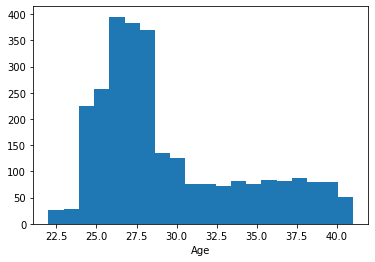

In [ ]:
plt.hist(X_numerical['Age'], bins=20)
plt.xlabel('Age')

plt.show()

Distribution of all the feature is somewhat left skewed so we will fill the missing values with median.

## Categorical Features

In [ ]:
X_categorical = X_train[categorical]

X_categorical.head()

,Education,JoiningYear,City,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain
2557,Bachelors,2012,Bangalore,3,Male,Yes,2
1718,Bachelors,2015,Pune,3,Female,Yes,5
3616,Masters,2015,New Delhi,3,Male,No,1
644,Masters,2016,New Delhi,3,Female,No,3
2844,Masters,2017,Pune,2,Female,No,4


In [ ]:
X_categorical.describe()

,JoiningYear,PaymentTier,ExperienceInCurrentDomain
count,2791.000000,2791.00000,2791.000000
mean,2015.067359,2.69115,2.917234
std,1.863374,0.56852,1.556335
min,2012.000000,1.00000,0.000000
25%,2013.000000,2.00000,2.000000
50%,2015.000000,3.00000,3.000000
75%,2017.000000,3.00000,4.000000
max,2018.000000,3.00000,7.000000


In [ ]:
X_categorical.drop(['JoiningYear', 'PaymentTier', 'ExperienceInCurrentDomain'], axis=1).describe()

,Education,City,Gender,EverBenched
count,2791,2791,2791,2791
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,2161,1331,1674,2524


In [ ]:
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)
X_categorical_encoded.head()

,JoiningYear,PaymentTier,ExperienceInCurrentDomain,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
2557,2012,3,2,0,0,0,0,1,1
1718,2015,3,5,0,0,0,1,0,1
3616,2015,3,1,1,0,1,0,1,0
644,2016,3,3,1,0,1,0,0,0
2844,2017,2,4,1,0,0,1,0,0


### Missing Values

The training data does not have any missing values but the testing data can. So, we will fill the missing values with the most frequent value in the feature.

### Feature Redundance

Now, we will find redundant categorical features.

We will try to find linear correlation between features using Pearson's correlation coefficient and non-linear correlation using Spearman's correlation.

For both we will plot a correlation matrix to make the result readable.

Source: https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/

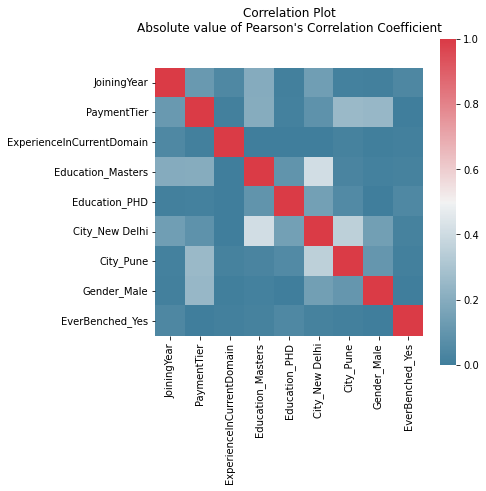

In [ ]:
pearson_corr = X_categorical_encoded.corr(method='pearson').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Pearson's Correlation Coefficient\n\n")
sns.heatmap(pearson_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

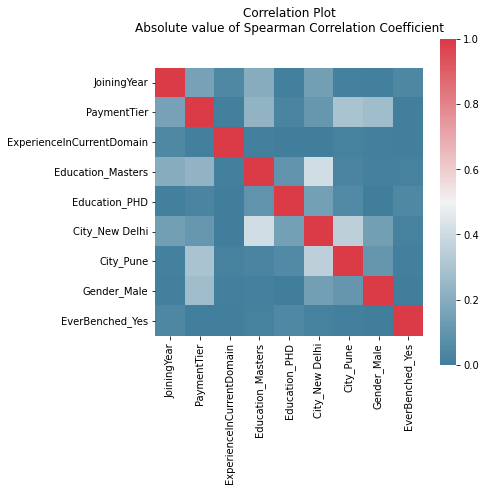

In [ ]:
spearman_corr = X_categorical_encoded.corr(method='spearman').abs()

fig, ax = plt.subplots(figsize=(6, 6))

plt.title("Correlation Plot\nAbsolute value of Spearman Correlation Coefficient\n\n")
sns.heatmap(spearman_corr,
            cmap=sns.diverging_palette(230, 10, as_cmap=True),
            square=True,
            vmin=0,
            vmax=1,
            ax=ax)
plt.show()

The correlation is not too strong between any pair of features to remove them.

Therefore, we can conclude that there are no redundant features.

### Feature Selection

Now, we will try to find feature relevance with the target.

For this we will use Chi-Squared test and Mutual Information.

Source: https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/

In [ ]:
chi_square = chi2(X_categorical_encoded, y_train)[0]

chi_square = pd.Series(chi_square, index=X_categorical_encoded.columns)
chi_square

JoiningYear                   0.150153
PaymentTier                  15.064181
ExperienceInCurrentDomain     2.215508
Education_Masters            34.279673
Education_PHD                 2.779494
City_New Delhi                1.627122
City_Pune                    96.347819
Gender_Male                  53.109851
EverBenched_Yes              23.010830
dtype: float64

The more the Chi-squared value the more important the feature is in predicting the result.

In [ ]:
mutual_info = mutual_info_classif(X_categorical_encoded, y_train, discrete_features=True, random_state=42)

mutual_info = pd.Series(mutual_info, index=X_categorical_encoded.columns)
mutual_info

JoiningYear                  0.087684
PaymentTier                  0.037445
ExperienceInCurrentDomain    0.002185
Education_Masters            0.007343
Education_PHD                0.000537
City_New Delhi               0.000392
City_Pune                    0.023080
Gender_Male                  0.023624
EverBenched_Yes              0.004385
dtype: float64

The more the Mutual Information value the more important the feature is in predicting the result.

Therefore, we can conclude `workex_Yes` is the most important categorical feature and `hsc_b_Others` is the least important categorical feature.

If and which features to remove we will decide by training some simple linear models after removing the features one by one based on their correlation values and evaluating their scores.